Index(['Member_number', 'Date', 'itemDescription'], dtype='object')
Frequent itemsets found: 415
Association rules found: 8


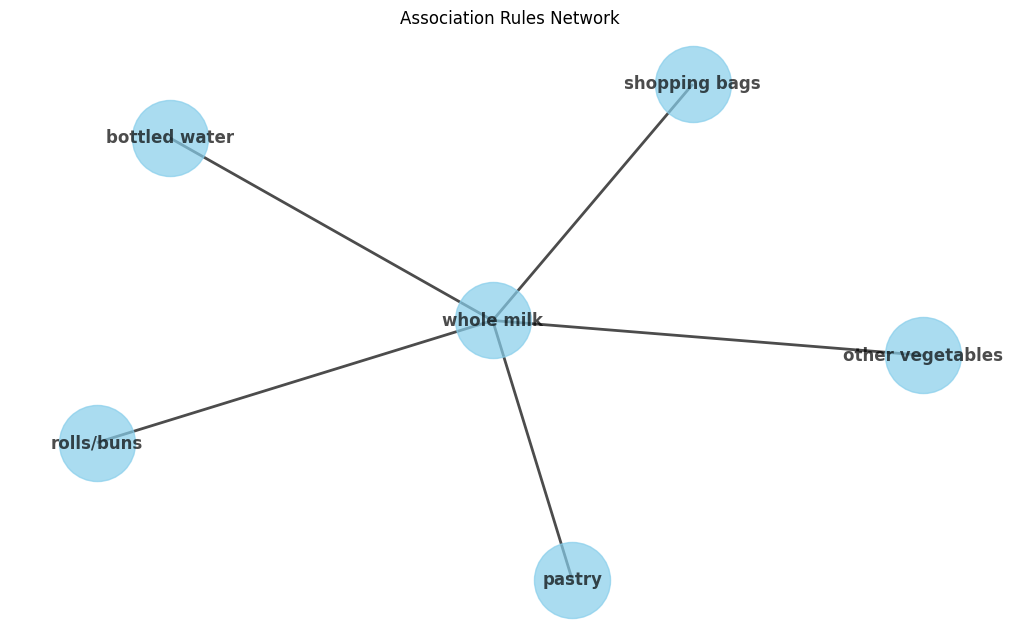

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

# ---- 1. Load the dataset ----
df = pd.read_csv('GroceriesDataset.csv')

# ---- 2. Inspect the dataset to check column names ----
print(df.columns)  # Print column names to identify the correct structure

# ---- 3. Preprocess the data ----
# Group by Member_number and aggregate item descriptions into lists for each member
transactions = df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

# ---- 4. Use TransactionEncoder to convert the list of transactions ----
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# ---- 5. Apply the Apriori Algorithm ----
min_support = 0.03  # Set support to 3%, can be adjusted based on the data
frequent_itemsets = apriori(df_transformed, min_support=min_support, use_colnames=True)

# Check if frequent itemsets were found
if frequent_itemsets.empty:
    print("No frequent itemsets found with the specified min_support threshold.")
else:
    print(f"Frequent itemsets found: {len(frequent_itemsets)}")

# ---- 6. Generate association rules with a lower confidence threshold ----
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Check if any rules were generated
if rules.empty:
    print("No association rules found with the specified confidence threshold.")
else:
    print(f"Association rules found: {len(rules)}")

    # ---- 7. Visualize Results using a Network Graph ----
    G = nx.Graph()

    # Add nodes and edges based on the rules
    for index, rule in rules.iterrows():
        # Each edge is an association rule: from 'antecedents' to 'consequents'
        G.add_edge(tuple(rule['antecedents'])[0], tuple(rule['consequents'])[0], weight=rule['confidence'])

    # Draw the network graph
    pos = nx.spring_layout(G)  # Layout for nodes
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', width=2, alpha=0.7)
    plt.title("Association Rules Network")
    plt.show()
